## Step 0: Importing Libraries and CSV file

In [1]:
# Importing libraries to handle data
import pandas as pd
import numpy as np

# Importing libraries for graph plottings
import graphviz
import matplotlib.pyplot as plt

import scipy
from scipy.stats import ttest_1samp
# From scipy import stats-related libraries
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from statistics import mean

# Importing Linear Regression
from sklearn.linear_model import LinearRegression
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# Importing libraries for creating pipeline
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None,'display.max_row', None)

In [2]:
#Read CSV
df=pd.read_csv("unified_csv.csv")
df.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 4050 non-null   object 
 1   status                                       4050 non-null   object 
 2   category_group_list                          4050 non-null   object 
 3   num_funding_rounds                           4050 non-null   float64
 4   total_funding_usd                            4050 non-null   float64
 5   founded_on                                   4050 non-null   float64
 6   employee_count                               4050 non-null   object 
 7   cat_commerce_shopping                        4050 non-null   float64
 8   cat_fin_services                             4050 non-null   float64
 9   cat_lending_invests                          4050 non-null   float64
 10  

In [3]:
df['employee_count'].value_counts()

def mapping (col):
    if col == "1-10":
        return 1
    elif col == "11-50":
        return 2
    elif col == "51-100":
        return 3
    elif col == "101-250":
        return 4
    elif col == "251-500":
        return 5
    elif col == "501-1000":
        return 6
    elif col == "10000+":
        return 7
    else:
        return 0

df['employee_count'] = df['employee_count'].apply(mapping)

best_4000 = df

## Step 1.1: Predicting closed / not closed / success using logistic regression

In [4]:
y = df['status_closed']
X = df.iloc[:,5:88]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on predicting closed company: {:.2f}'.format(logreg.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


# Drop away all closed companies, avoid false positive
pred_arr = logreg.predict(df.iloc[:,5:88])
to_be_dropped = []
for i in range(len(df)):
    if pred_arr[i] == 1:
       to_be_dropped.append(i)
df.drop(to_be_dropped, inplace = True)
df = df.reset_index(drop = True)

Accuracy of logistic regression classifier on predicting closed company: 0.97
[[1176    0]
 [  39    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1176
           1       0.00      0.00      0.00        39

    accuracy                           0.97      1215
   macro avg       0.48      0.50      0.49      1215
weighted avg       0.94      0.97      0.95      1215



In [5]:
"""
#step 1.2 predicting being acquired or undergo ipo
y = df['has_acquisitions']
X = df.iloc[:,5:88]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on predicting being acquired: {:.2f}'.format(logreg.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))
"""
# cannot predict any has acquisitions

"\n#step 1.2 predicting being acquired or undergo ipo\ny = df['has_acquisitions']\nX = df.iloc[:,5:88]\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)\nlogreg = LogisticRegression()\nlogreg.fit(X_train, y_train)\n\ny_pred = logreg.predict(X_test)\nprint('Accuracy of logistic regression classifier on predicting being acquired: {:.2f}'.format(logreg.score(X_test, y_test)))\n\nprint(confusion_matrix(y_test, y_pred))\n\nprint(classification_report(y_test, y_pred))\n"

In [6]:
"""
y = df['has_ipo']
X = df.iloc[:,5:88]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on predicting closed company: {:.2f}'.format(logreg.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))
"""
# cannot predict any has ipo

"\ny = df['has_ipo']\nX = df.iloc[:,5:88]\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)\nlogreg = LogisticRegression()\nlogreg.fit(X_train, y_train)\n\ny_pred = logreg.predict(X_test)\nprint('Accuracy of logistic regression classifier on predicting closed company: {:.2f}'.format(logreg.score(X_test, y_test)))\n\nprint(confusion_matrix(y_test, y_pred))\n\nprint(classification_report(y_test, y_pred))\n"

## Step 1.2: Predicting those above 50% threshold of average momentum using logistic regression

In [7]:
X = df.iloc[:,5:88]
y2 = df['average_momentum']
y2_threshold = np.percentile(y2, [50])
y2 = y2.apply(lambda x: 1 if x >= y2_threshold else 0)


X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on av_momentum with 50% as threshold: {:.2f}'.format(logreg.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


# Drop away all companies below threshold using av_momentum as predictor, avoid false positive
pred_arr = logreg.predict(df.iloc[:,5:88])
to_be_dropped = []
for i in range(len(df)):
    if pred_arr[i] == 0:
       to_be_dropped.append(i)
df.drop(to_be_dropped, inplace = True)
df = df.reset_index(drop = True)

Accuracy of logistic regression classifier on av_momentum with 50% as threshold: 0.58
[[255 360]
 [147 453]]
              precision    recall  f1-score   support

           0       0.63      0.41      0.50       615
           1       0.56      0.76      0.64       600

    accuracy                           0.58      1215
   macro avg       0.60      0.58      0.57      1215
weighted avg       0.60      0.58      0.57      1215



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680 entries, 0 to 2679
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 2680 non-null   object 
 1   status                                       2680 non-null   object 
 2   category_group_list                          2680 non-null   object 
 3   num_funding_rounds                           2680 non-null   float64
 4   total_funding_usd                            2680 non-null   float64
 5   founded_on                                   2680 non-null   float64
 6   employee_count                               2680 non-null   int64  
 7   cat_commerce_shopping                        2680 non-null   float64
 8   cat_fin_services                             2680 non-null   float64
 9   cat_lending_invests                          2680 non-null   float64
 10  

In [9]:
#Preparing xlabel and ylabel
features= df.iloc[:,0:88]

ylabel=df[["average_momentum"]]

features.head()

,company_name,status,category_group_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_num_invested_by_top_100,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid
0,All of Us,operating,"Financial Services,Lending and Investments",3.0,4025000.0,4.0767,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9945,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,3500000.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,PayPlug,acquired,"Commerce and Shopping,Financial Services,Payments",5.0,13316538.0,8.7507,2,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0767,0.833333,0.166667,0.333333,0.166667,0.000000,0.000000,6.0,1832166.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,AID:Tech,operating,"Financial Services,Government and Military,Inf...",10.0,3180350.0,4.7068,2,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,55.2630,0.842105,0.157895,0.526316,0.052632,0.263158,0.052632,19.0,1180350.0,0.0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,OwlTing,operating,"Commerce and Shopping,Mobile,Other,Travel and ...",4.0,5700000.0,10.4164,4,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.6986,1.000000,0.000000,1.000000,0.166667,0.333333,0.000000,6.0,2100000.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,SaveUp,operating,"Education,Financial Services,Internet Services...",2.0,7000000.0,9.8356,2,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,41.9616,0.714286,0.285714,1.142857,0.285714,0.000000,0.571429,7.0,2000000.0,0.0,2.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
#print value_counts of each column of feature dataframe
for i in features.columns: 
    x= features[i].value_counts()
    print("column: ",i,", value is:",x)
    print()

    1
1021000.0      1
399910.0       1
3657850.0      1
1067223.0      1
2691154.0      1
3362692.0      1
2772753.0      1
1370000.0      1
4824682.0      1
3770000.0      1
898000.0       1
54952.0        1
560000.0       1
88187.0        1
4099999.0      1
277000.0       1
1992665.0      1
1157091.0      1
1665000.0      1
951288.0       1
821396.0       1
6200000.0      1
223489.0       1
436742.0       1
1197755.0      1
2313541.0      1
1120533.0      1
75355.0        1
111699.0       1
477473.0       1
7542005.0      1
2032959.0      1
203944.0       1
7279888.0      1
3448590.0      1
5150000.0      1
203946.0       1
2443940.0      1
910000.0       1
514396.0       1
2870000.0      1
5936631.0      1
11086894.0     1
1540000.0      1
506500.0       1
481639.0       1
647890.0       1
1785000.0      1
1738025.0      1
570000.0       1
430391.0       1
873045.0       1
148630.0       1
1443000.0      1
3852676.0      1
625000.0       1
1869000.0      1
442676.0       1
2247087.

In [11]:
#print value_counts of each column of ylabel dataframe
for i in ylabel.columns: 
    x= ylabel[i].value_counts()
    print("column: ",i,", value is:",x)
    print()

918327    1
 0.422093    1
 1.507468    1
 0.933605    1
 0.621498    1
 1.351921    1
 0.662851    1
 1.551367    1
 0.506794    1
 4.462515    1
-0.291132    1
 1.952535    1
 0.494610    1
 0.381096    1
-0.538386    1
-0.028813    1
 0.498604    1
 1.081582    1
 0.663658    1
 0.375070    1
 1.186643    1
 0.089040    1
 0.766295    1
 1.085839    1
 0.234644    1
 3.103808    1
 0.093960    1
 2.645503    1
 0.400000    1
 1.334632    1
 2.939618    1
 2.320043    1
 0.442809    1
 7.682525    1
 0.331070    1
 0.432141    1
 1.157876    1
 0.708272    1
 0.971830    1
 0.588532    1
 0.190840    1
 0.480092    1
 0.808196    1
 1.228838    1
-0.411070    1
 0.250021    1
 0.540719    1
-0.718800    1
-1.981492    1
 0.849482    1
 0.436038    1
 0.828737    1
 0.868434    1
 0.984725    1
 1.037178    1
 0.666667    1
 0.565329    1
 1.588782    1
 0.725242    1
 0.349910    1
-1.067264    1
 1.031584    1
-0.159319    1
 4.456924    1
 1.046938    1
 0.896059    1
 0.635388    

In [12]:
###### DO qcut for all ylabels ####### 

binary_labels = [0,1]

ylabel["average_momentum"]= pd.qcut(ylabel["average_momentum"], 2, labels = binary_labels)

ylabel

,average_momentum
0,1
1,1
2,0
3,0
4,1
5,1
6,0
7,1
8,1
9,0


In [13]:
#Train model to predict each ylabel

X_train, X_test, y_train, y_test = train_test_split(features.drop(columns=['company_name', 'status', 'category_group_list', 'num_funding_rounds','total_funding_usd']), ylabel["average_momentum"], test_size=0.3, random_state=5)
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
    
# use the trained model to predict test set for evaluation
pred_test = model.predict(X_test)

# print out evaluation result
print("Predicting: ", i)
    
print("Accuracy:{}".format(accuracy_score(y_test, pred_test, normalize=True, sample_weight=None)))
print("Classification Report:\n{}".format(classification_report(y_test, pred_test)))
print("Confusion Matrix:\n{}".format(confusion_matrix(y_test, pred_test)))
print("--------------------------------------------------------------------------")
prediction=model.predict(features.drop(columns=['company_name', 'status', 'category_group_list', 'num_funding_rounds','total_funding_usd']))
result = features
result["tree_prediction"]=prediction

Predicting:  average_momentum
Accuracy:0.5970149253731343
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.60      0.59       399
           1       0.60      0.60      0.60       405

    accuracy                           0.60       804
   macro avg       0.60      0.60      0.60       804
weighted avg       0.60      0.60      0.60       804

Confusion Matrix:
[[238 161]
 [163 242]]
--------------------------------------------------------------------------


In [14]:
result["tree_prediction"].value_counts()

0    1342
1    1338
Name: tree_prediction, dtype: int64

In [15]:
result["average_momentum"]= df["average_momentum"]
result= result.reset_index()
result= result.drop(columns= ["index"])
result.head()

,company_name,status,category_group_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_num_invested_by_top_100,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid,tree_prediction,average_momentum
0,All of Us,operating,"Financial Services,Lending and Investments",3.0,4025000.0,4.0767,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9945,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,3500000.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.964229
1,PayPlug,acquired,"Commerce and Shopping,Financial Services,Payments",5.0,13316538.0,8.7507,2,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0767,0.833333,0.166667,0.333333,0.166667,0.000000,0.000000,6.0,1832166.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.934681
2,AID:Tech,operating,"Financial Services,Government and Military,Inf...",10.0,3180350.0,4.7068,2,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,55.2630,0.842105,0.157895,0.526316,0.052632,0.263158,0.052632,19.0,1180350.0,0.0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.228600
3,OwlTing,operating,"Commerce and Shopping,Mobile,Other,Travel and ...",4.0,5700000.0,10.4164,4,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.6986,1.000000,0.000000,1.000000,0.166667,0.333333,0.000000,6.0,2100000.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.341418
4,SaveUp,operating,"Education,Financial Services,Internet Services...",2.0,7000000.0,9.8356,2,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,41.9616,0.714286,0.285714,1.142857,0.285714,0.000000,0.571429,7.0,2000000.0,0.0,2.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.854750


## Step 2: Predicting those above 50% threshold of average momentum by Decision Tree

In [16]:
# Drop away those below median as the average momentum threshold, predicted by decision tree
# Double Confirmation of NO FALSE POSITIVE
to_be_dropped = []
for i in range (len(result)):
    if result['tree_prediction'].iloc[i] == 0:
        to_be_dropped.append(i)
result.drop(to_be_dropped, inplace = True)
result = result.reset_index(drop = True)

In [17]:
df = result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 90 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 1338 non-null   object 
 1   status                                       1338 non-null   object 
 2   category_group_list                          1338 non-null   object 
 3   num_funding_rounds                           1338 non-null   float64
 4   total_funding_usd                            1338 non-null   float64
 5   founded_on                                   1338 non-null   float64
 6   employee_count                               1338 non-null   int64  
 7   cat_commerce_shopping                        1338 non-null   float64
 8   cat_fin_services                             1338 non-null   float64
 9   cat_lending_invests                          1338 non-null   float64
 10  

## Step 3: Predicting the best momentum venture companies by Polynomial Regression

Accuracy Score of Degree 1 model:  0.11519367760319499


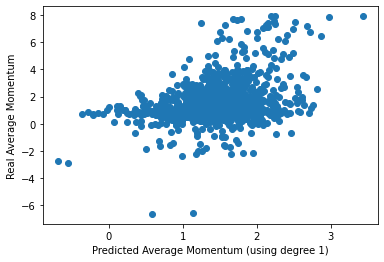

In [18]:
# ###### Try: Degree 1 #######

features = df.iloc[:,5:-1]

# # define independent variables/attirbutes/features
x = features[:]
y = df[["average_momentum"]]

# #Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=1)
x_poly= pre_process.fit_transform(x)

# # Training the model
pr_model= LinearRegression()

# # Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
print("Accuracy Score of Degree 1 model: ", pr_model.score(x_poly, y))
# # Store our predicted ROI values in the variable y_pred
y_pred_1 = pr_model.predict(x_poly)


# # Plot our model on our data
plt.scatter(y_pred_1, df.iloc[:,-1])
plt.xlabel("Predicted Average Momentum (using degree 1)")
plt.ylabel("Real Average Momentum")
plt.show()

Accuracy Score of Degree 2 model:  0.728227395923976


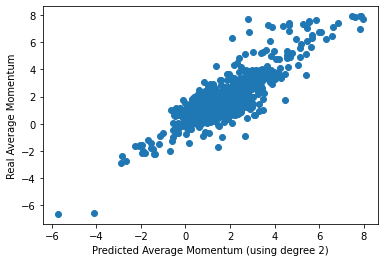

In [19]:
# ###### Try: Degree 2 #######

features = df.iloc[:,5:-1]

# # define independent variables/attirbutes/features
x = features[:]
y = df[["average_momentum"]]

# #Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=2)
x_poly= pre_process.fit_transform(x)

# # Training the model
pr_model= LinearRegression()

# # Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
print("Accuracy Score of Degree 2 model: ", pr_model.score(x_poly, y))
# # Store our predicted ROI values in the variable y_pred
y_pred_2 = pr_model.predict(x_poly)


# # Plot our model on our data
plt.scatter(y_pred_2, df.iloc[:,-1])
plt.xlabel("Predicted Average Momentum (using degree 2)")
plt.ylabel("Real Average Momentum")
plt.show()

Accuracy Score of Degree 3 model:  0.22805273953917005


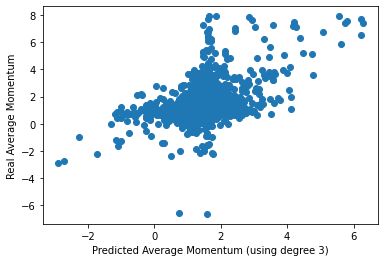

In [20]:
# ###### Try: Degree 3 #######

features = df.iloc[:,5:-1]

# # define independent variables/attirbutes/features
x = features[:]
y = df[["average_momentum"]]

# #Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=3)
x_poly= pre_process.fit_transform(x)

# # Training the model
pr_model= LinearRegression()

# # Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
print("Accuracy Score of Degree 3 model: ", pr_model.score(x_poly, y))
# # Store our predicted ROI values in the variable y_pred
y_pred_3 = pr_model.predict(x_poly)


# # Plot our model on our data
plt.scatter(y_pred_3, df.iloc[:,-1])
plt.xlabel("Predicted Average Momentum (using degree 3)")
plt.ylabel("Real Average Momentum")
plt.show()

## Step 4: Rank the predicted momentum values

In [21]:
df['predicted_momentum_using_degree_2'] = y_pred_2
df = df.sort_values(by='predicted_momentum_using_degree_2', ascending=False)

In [22]:
df = df.reset_index(drop = True)
#df = df[(df['founded_on'] <=5)]

## Step 5: Extract the top 100 companies to a CSV file

In [23]:
df.head()

,company_name,status,category_group_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_num_invested_by_top_100,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid,tree_prediction,average_momentum,predicted_momentum_using_degree_2
0,FRESCO,operating,Unknown,2.0,5100000.0,3.2932,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.1671,0.500,0.500,0.500,0.500000,0.000,0.0,2.0,5100000.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.707857,7.954441
1,BrikkApp,operating,"Commerce and Shopping,Financial Services,Other...",2.0,542698.0,3.0767,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.000,0.000,0.000,0.000000,0.000,0.0,0.0,539388.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.921425,7.880826
2,Beatdapp,operating,Unknown,4.0,2421799.0,3.0767,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,34.9781,0.875,0.125,0.625,0.250000,0.125,0.0,8.0,2419299.0,0.0,10.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.920122,7.852840
3,Avenews-GT,operating,"Agriculture and Farming,Commerce and Shopping,...",2.0,340000.0,3.7918,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.3644,1.000,0.000,0.000,0.222222,0.000,0.0,9.0,340000.0,0.0,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,7.000023,7.847504
4,SONM,operating,Unknown,2.0,42500000.0,5.0795,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,35.5562,1.000,0.000,0.375,0.375000,0.000,0.0,8.0,500000.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.833699,7.614772


In [24]:
best_100 = df.iloc[:100]
output_best_100 = best_100.loc[:,['company_name','employee_count','num_funding_rounds','fd_rd_latest_investment','cat_lending_invests','cat_payments','cat_commerce_shopping','first_fund_investor_count','first_fund_post_money','num_exec','fd_rd_num_invested_by_top_100','average_momentum']]
output_best_100.to_csv("predicted_best_100.csv", index=False)
output_all = df.loc[:,['company_name','employee_count','num_funding_rounds','fd_rd_latest_investment','cat_lending_invests','cat_payments','cat_commerce_shopping','first_fund_investor_count','first_fund_post_money','num_exec','fd_rd_num_invested_by_top_100','average_momentum']]
output_all.to_csv("all_validated_companies_ranked.csv", index=False)

## Step 6: Explaining Important Features

In [25]:
best_100 = best_100.iloc[:,6:-3]
best_1300 = df.iloc[:,6:-3]
best_4000 = best_4000.iloc[:,6:-8]
best_100.head()

,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_num_invested_by_top_100,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid
0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.1671,0.500,0.500,0.500,0.500000,0.000,0.0,2.0,5100000.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.000,0.000,0.000,0.000000,0.000,0.0,0.0,539388.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,34.9781,0.875,0.125,0.625,0.250000,0.125,0.0,8.0,2419299.0,0.0,10.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.3644,1.000,0.000,0.000,0.222222,0.000,0.0,9.0,340000.0,0.0,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,35.5562,1.000,0.000,0.375,0.375000,0.000,0.0,8.0,500000.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
"""
# Not Normalized Values

for i in range (len(best_100.columns)):
    if best_100.iloc[:,i].mean() > best_1300.iloc[:,i].mean() \
    and best_100.iloc[:,i].mean() > best_4000.iloc[:,i].mean() \
    and best_1300.iloc[:,i].mean() > best_4000.iloc[:,i].mean():
        print(str(best_100.columns[i])+" is a positively important feature !\nThe average value at TOP 100: " +str(best_100.iloc[:,i].mean()) +";"+\
             "\nwhile the average value at Prelim Filtered: " +str(best_1300.iloc[:,i].mean()) +";"+\
              "\nand that the average value at All Fintech: " +str(best_4000.iloc[:,i].mean()) +"\n")
"""

'\n# Not Normalized Values\n\nfor i in range (len(best_100.columns)):\n    if best_100.iloc[:,i].mean() > best_1300.iloc[:,i].mean()     and best_100.iloc[:,i].mean() > best_4000.iloc[:,i].mean()     and best_1300.iloc[:,i].mean() > best_4000.iloc[:,i].mean():\n        print(str(best_100.columns[i])+" is a positively important feature !\nThe average value at TOP 100: " +str(best_100.iloc[:,i].mean()) +";"+             "\nwhile the average value at Prelim Filtered: " +str(best_1300.iloc[:,i].mean()) +";"+              "\nand that the average value at All Fintech: " +str(best_4000.iloc[:,i].mean()) +"\n")\n'

In [27]:
"""
# Not Normalized Values
for i in range (len(best_100.columns)):
    if best_100.iloc[:,i].mean() < best_1300.iloc[:,i].mean() \
    and best_100.iloc[:,i].mean() < best_4000.iloc[:,i].mean() \
    and best_1300.iloc[:,i].mean() < best_4000.iloc[:,i].mean() and best_100.iloc[:,i].mean() != 0:
        print(str(best_100.columns[i])+" is an inversely important feature!\nThe average value at TOP 100: " +str(best_100.iloc[:,i].mean()) +";"+\
             "\nwhile the average value at Prelim Filtered: " +str(best_1300.iloc[:,i].mean()) +";"+\
              "\nand that the average value at All Fintech: " +str(best_4000.iloc[:,i].mean()) +"\n")
"""

'\n# Not Normalized Values\nfor i in range (len(best_100.columns)):\n    if best_100.iloc[:,i].mean() < best_1300.iloc[:,i].mean()     and best_100.iloc[:,i].mean() < best_4000.iloc[:,i].mean()     and best_1300.iloc[:,i].mean() < best_4000.iloc[:,i].mean() and best_100.iloc[:,i].mean() != 0:\n        print(str(best_100.columns[i])+" is an inversely important feature!\nThe average value at TOP 100: " +str(best_100.iloc[:,i].mean()) +";"+             "\nwhile the average value at Prelim Filtered: " +str(best_1300.iloc[:,i].mean()) +";"+              "\nand that the average value at All Fintech: " +str(best_4000.iloc[:,i].mean()) +"\n")\n'

In [28]:
x = best_100.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
best_100_scaled = pd.DataFrame(x_scaled)


x = best_1300.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
best_1300_scaled = pd.DataFrame(x_scaled)


x = best_4000.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
best_4000_scaled = pd.DataFrame(x_scaled)

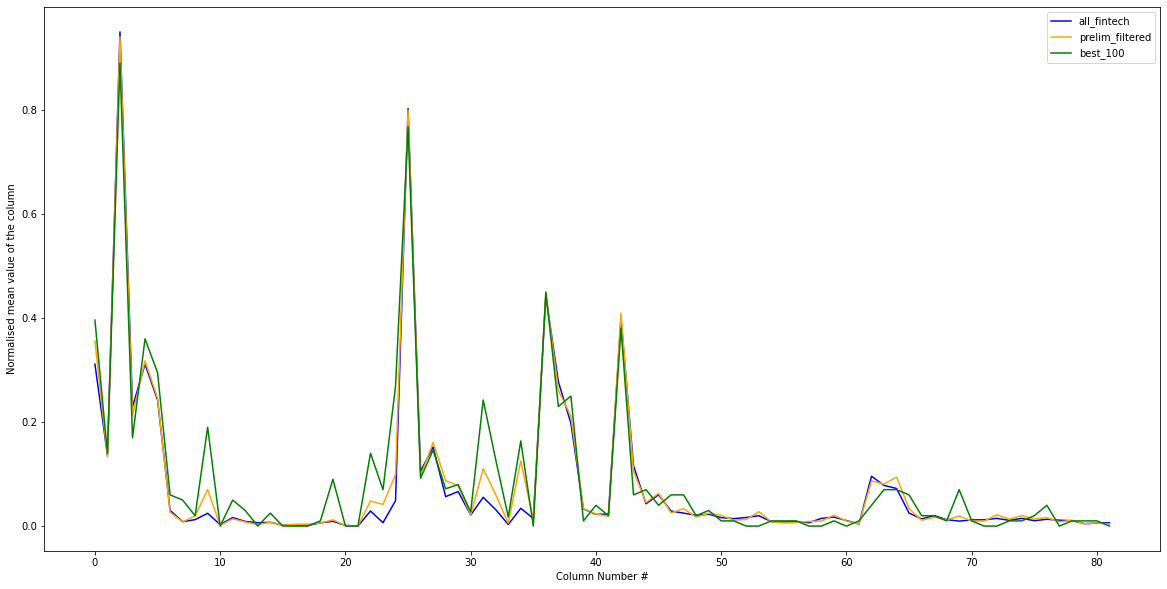

In [29]:
best_100_scaled_mean = []
for i in range(len(best_100_scaled.columns)):
    best_100_scaled_mean.append(best_100_scaled.iloc[:,i].mean())\
    
best_1300_scaled_mean = []
for i in range(len(best_1300_scaled.columns)):
    best_1300_scaled_mean.append(best_1300_scaled.iloc[:,i].mean())

best_4000_scaled_mean = []
for i in range(len(best_4000_scaled.columns)):
    best_4000_scaled_mean.append(best_4000_scaled.iloc[:,i].mean())

plt.figure(figsize=(20,10))
plt.plot(best_100_scaled.columns.to_list(), best_4000_scaled_mean, color='blue', label='all_fintech')
plt.plot(best_100_scaled.columns.to_list(), best_1300_scaled_mean, color='orange', label='prelim_filtered')
plt.plot(best_100_scaled.columns.to_list(), best_100_scaled_mean, color='green', label='best_100')
plt.xlabel("Column Number #")
plt.ylabel("Normalised mean value of the column")
plt.legend()
plt.show()

In [30]:
sorted_df = pd.DataFrame([best_4000_scaled_mean, best_1300_scaled_mean, best_100_scaled_mean], columns=list(best_100.columns.values))
sorted_df.head()

,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_num_invested_by_top_100,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid
0,0.311429,0.136296,0.950123,0.229136,0.311358,0.242540,0.030281,0.008477,0.012412,0.024599,0.002765,0.016420,0.009012,0.006502,0.007243,0.001728,0.001811,0.001646,0.006173,0.009300,0.001358,0.0,0.028981,0.006507,0.048884,0.802634,0.105515,0.152049,0.056601,0.066461,0.021219,0.055378,0.031537,0.003101,0.034231,0.014568,0.442469,0.277531,0.197778,0.033086,0.022469,0.023210,0.399506,0.116049,0.042963,0.060247,0.028889,0.024938,0.020988,0.022716,0.016296,0.014321,0.016543,0.020000,0.008642,0.007654,0.008642,0.006420,0.014815,0.017284,0.010617,0.003951,0.095802,0.078272,0.072346,0.024938,0.013827,0.020247,0.012346,0.009630,0.011852,0.012099,0.014815,0.011111,0.014815,0.010370,0.013086,0.011358,0.010370,0.004691,0.005679,0.006420
1,0.356253,0.133034,0.940957,0.213752,0.317638,0.245783,0.026586,0.007997,0.019646,0.070254,0.001308,0.013827,0.007922,0.002616,0.007474,0.001495,0.003488,0.003737,0.005979,0.011958,0.001121,0.0,0.048206,0.041766,0.099315,0.799377,0.095989,0.160836,0.087303,0.077891,0.021370,0.110382,0.060347,0.005636,0.125625,0.011958,0.448430,0.260837,0.211510,0.033632,0.023169,0.018685,0.409567,0.105381,0.045590,0.062780,0.025411,0.033632,0.017190,0.024664,0.020927,0.011211,0.012706,0.027653,0.008221,0.005979,0.006726,0.008969,0.009716,0.020927,0.009716,0.003737,0.086697,0.080717,0.094170,0.033632,0.011211,0.017190,0.011958,0.019432,0.009716,0.009716,0.021674,0.013453,0.020179,0.013453,0.016442,0.008221,0.011211,0.004484,0.005979,0.003737
2,0.396000,0.140000,0.890000,0.170000,0.360000,0.295000,0.060000,0.050000,0.020000,0.190000,0.000000,0.050000,0.030000,0.000000,0.025000,0.000000,0.000000,0.000000,0.010000,0.090000,0.000000,0.0,0.140000,0.070000,0.268970,0.768058,0.091942,0.146148,0.071806,0.079806,0.027076,0.242353,0.127427,0.017563,0.163750,0.000000,0.450000,0.230000,0.250000,0.010000,0.040000,0.020000,0.380000,0.060000,0.070000,0.040000,0.060000,0.060000,0.020000,0.030000,0.010000,0.010000,0.000000,0.000000,0.010000,0.010000,0.010000,0.000000,0.000000,0.010000,0.000000,0.010000,0.040000,0.070000,0.070000,0.060000,0.020000,0.020000,0.010000,0.070000,0.010000,0.000000,0.000000,0.010000,0.010000,0.020000,0.040000,0.000000,0.010000,0.010000,0.010000,0.000000


In [31]:
sorted_df.sort_values(by=0, axis=1, ascending=False, inplace=True)
sorted_df.head()

,cat_fin_services,gender_male,continent_NA,country_code_USA,employee_count,cat_payments,continent_EU,fd_rd_latest_investment,cat_lending_invests,continent_AS,degree_type,cat_commerce_shopping,country_code_GBR,gender_female,city_London,city_New York,city_San Francisco,subject_STEM,country_code_CHN,subject_Business,num_exec,job_duration,country_code_IND,first_fund_investor_count,continent_SA,first_fund_raised,fd_rd_investment_type_series_unknown,fd_rd_num_invested_by_top_100,country_code_CAN,city_Singapore,country_code_SGP,fd_rd_investment_type_pre_seed,continent_OC,country_code_DEU,continent_AF,subject_Arts_SoSc,country_code_AUS,city_Beijing,country_code_FRA,country_code_JPN,country_code_ESP,fd_rd_investment_type_convertible_note,country_code_BRA,country_code_SWE,city_Paris,city_Tokyo,has_parent,country_code_CHE,city_Toronto,city_Boston,fd_rd_investment_type_debt_financing,city_Mumbai,city_Sydney,city_Chicago,city_Stockholm,city_São Paulo,country_code_MEX,city_Berlin,city_Shanghai,city_Los Angeles,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_equity_crowdfunding,country_code_ISR,country_code_NLD,fd_rd_investment_type_grant,country_code_HKG,fd_rd_investment_type_undisclosed,event_count,fd_rd_investment_type_private_equity,country_code_KOR,city_Madrid,fd_rd_investment_type_non_equity_assistance,city_Amsterdam,city_Tel Aviv,country_code_IDN,first_fund_post_money,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_corporate_round,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary
0,0.950123,0.802634,0.442469,0.399506,0.311429,0.311358,0.277531,0.242540,0.229136,0.197778,0.152049,0.136296,0.116049,0.105515,0.095802,0.078272,0.072346,0.066461,0.060247,0.056601,0.055378,0.048884,0.042963,0.034231,0.033086,0.031537,0.030281,0.028981,0.028889,0.024938,0.024938,0.024599,0.023210,0.022716,0.022469,0.021219,0.020988,0.020247,0.020000,0.017284,0.016543,0.016420,0.016296,0.014815,0.014815,0.014815,0.014568,0.014321,0.013827,0.013086,0.012412,0.012346,0.012099,0.011852,0.011358,0.011111,0.010617,0.010370,0.010370,0.009630,0.009300,0.009012,0.008642,0.008642,0.008477,0.007654,0.007243,0.006507,0.006502,0.006420,0.006420,0.006173,0.005679,0.004691,0.003951,0.003101,0.002765,0.001811,0.001728,0.001646,0.001358,0.0
1,0.940957,0.799377,0.448430,0.409567,0.356253,0.317638,0.260837,0.245783,0.213752,0.211510,0.160836,0.133034,0.105381,0.095989,0.086697,0.080717,0.094170,0.077891,0.062780,0.087303,0.110382,0.099315,0.045590,0.125625,0.033632,0.060347,0.026586,0.048206,0.025411,0.033632,0.033632,0.070254,0.018685,0.024664,0.023169,0.021370,0.017190,0.017190,0.027653,0.020927,0.012706,0.013827,0.020927,0.009716,0.021674,0.020179,0.011958,0.011211,0.011211,0.016442,0.019646,0.011958,0.009716,0.009716,0.008221,0.013453,0.009716,0.013453,0.011211,0.019432,0.011958,0.007922,0.006726,0.008221,0.007997,0.005979,0.007474,0.041766,0.002616,0.008969,0.003737,0.005979,0.005979,0.004484,0.003737,0.005636,0.001308,0.003488,0.001495,0.003737,0.001121,0.0
2,0.890000,0.768058,0.450000,0.380000,0.396000,0.360000,0.230000,0.295000,0.170000,0.250000,0.146148,0.140000,0.060000,0.091942,0.040000,0.070000,0.070000,0.079806,0.040000,0.071806,0.242353,0.268970,0.070000,0.163750,0.010000,0.127427,0.060000,0.140000,0.060000,0.060000,0.060000,0.190000,0.020000,0.030000,0.040000,0.027076,0.020000,0.020000,0.000000,0.010000,0.000000,0.050000,0.010000,0.000000,0.000000,0.010000,0.000000,0.010000,0.020000,0.040000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.000000,0.020000,0.010000,0.070000,0.090000,0.030000,0.010000,0.010000,0.050000,0.010000,0.025000,0.070000,0.000000,0.000000,0.000000,0.010000,0.010000,0.010000,0.010000,0.017563,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


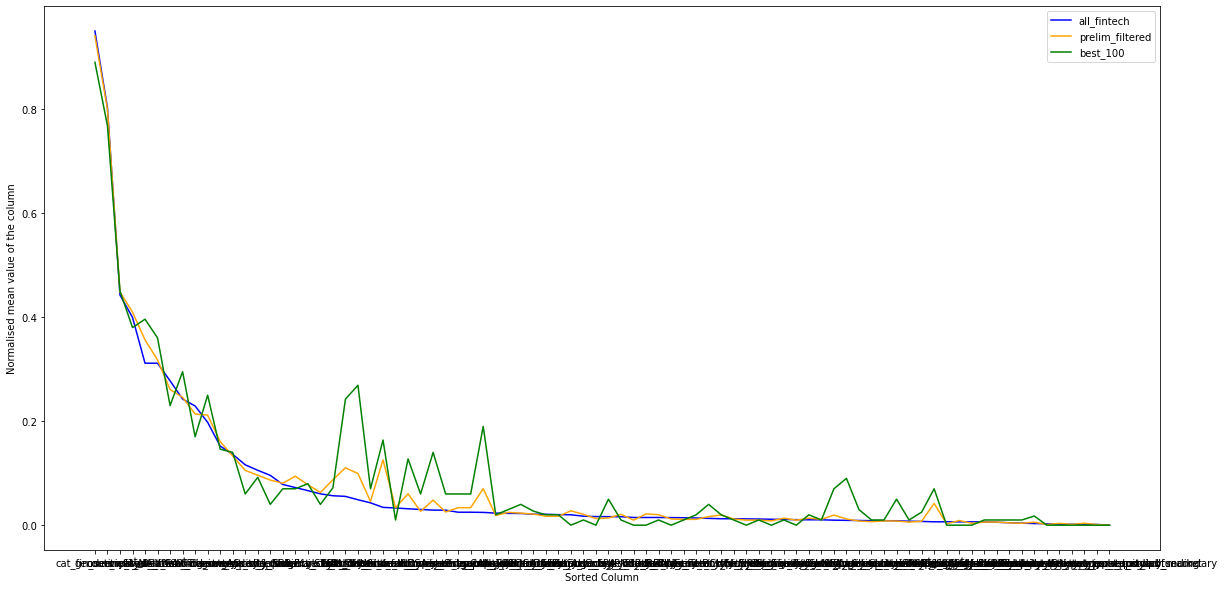

In [32]:
plt.figure(figsize=(20,10))
plt.plot(sorted_df.iloc[0].index.to_list(), list(sorted_df.iloc[0]), color='blue', label='all_fintech')
plt.plot(sorted_df.iloc[0].index.to_list(), list(sorted_df.iloc[1]), color='orange', label='prelim_filtered')
plt.plot(sorted_df.iloc[0].index.to_list(), list(sorted_df.iloc[2]), color='green', label='best_100')
plt.xlabel("Sorted Column")
plt.ylabel("Normalised mean value of the column")
plt.legend()
plt.show()

In [33]:
for i in range(len(best_100.columns)):
    feature_mean = best_4000.iloc[:, i].mean()
    tset, pval = ttest_1samp(best_100.iloc[:, i].values, feature_mean)
    
    if pval < 0.05:    # alpha value is 0.05 or 5%
        # only print rejected
        print("Rejecting null hypothesis for " + str(df.columns[i]))
        print("Feature mean for all: " + str(feature_mean))
        print("Feature mean for TOP 100: " + str(best_100.iloc[:, i].mean()))
        print('p-values',pval,'\n')
    # else:
    #     print("we are accepting null hypothesis")

Rejecting null hypothesis for founded_on
Feature mean for all: 1.6977777777777778
Feature mean for TOP 100: 1.18
p-values 5.0301925021274216e-11 

Rejecting null hypothesis for employee_count
Feature mean for all: 0.3330864197530864
Feature mean for TOP 100: 0.06
p-values 8.117477876535823e-20 

Rejecting null hypothesis for cat_commerce_shopping
Feature mean for all: 0.1017283950617284
Feature mean for TOP 100: 0.05
p-values 0.020155734795510263 

Rejecting null hypothesis for cat_fin_services
Feature mean for all: 0.18617283950617283
Feature mean for TOP 100: 0.04
p-values 2.9876399149919015e-08 

Rejecting null hypothesis for cat_lending_invests
Feature mean for all: 0.19679012345679012
Feature mean for TOP 100: 0.38
p-values 0.0021815846119671565 

Rejecting null hypothesis for cat_payments
Feature mean for all: 0.013827160493827161
Feature mean for TOP 100: 0.0
p-values 0.0 

Rejecting null hypothesis for fd_rd_latest_investment
Feature mean for all: 0.09851851851851852
Feature me

In [34]:
# Normalised Values here, see positive relationships

for i in range (len(best_100.columns)):
    if best_100_scaled.iloc[:,i].mean() > best_1300_scaled.iloc[:,i].mean() \
    and best_100_scaled.iloc[:,i].mean() > best_4000_scaled.iloc[:,i].mean() \
    and best_1300_scaled.iloc[:,i].mean() > best_4000_scaled.iloc[:,i].mean():
        print(str(best_100.columns[i])+" is a positively important feature !\nThe average value at TOP 100: " +str(best_100_scaled.iloc[:,i].mean()) +";"+\
             "\nwhile the average value at Prelim Filtered: " +str(best_1300_scaled.iloc[:,i].mean()) +";"+\
              "\nand that the average value at All Fintech: " +str(best_4000_scaled.iloc[:,i].mean()) +"\n")

employee_count is a positively important feature !
The average value at TOP 100: 0.3959999999999996;
while the average value at Prelim Filtered: 0.3562531141006459;
and that the average value at All Fintech: 0.3114285714285705

cat_payments is a positively important feature !
The average value at TOP 100: 0.36;
while the average value at Prelim Filtered: 0.31763826606875933;
and that the average value at All Fintech: 0.31135802469135804

fd_rd_latest_investment is a positively important feature !
The average value at TOP 100: 0.295;
while the average value at Prelim Filtered: 0.24578261797992781;
and that the average value at All Fintech: 0.24253968253968317

fd_rd_investment_type_debt_financing is a positively important feature !
The average value at TOP 100: 0.02;
while the average value at Prelim Filtered: 0.01964552637198375;
and that the average value at All Fintech: 0.01241152263374493

fd_rd_investment_type_pre_seed is a positively important feature !
The average value at TOP 10

In [35]:
# Normalised Values here, see inverse relationships

for i in range (len(best_100.columns)):
    if best_100_scaled.iloc[:,i].mean() < best_1300_scaled.iloc[:,i].mean() \
    and best_100_scaled.iloc[:,i].mean() < best_4000_scaled.iloc[:,i].mean() \
    and best_1300_scaled.iloc[:,i].mean() < best_4000_scaled.iloc[:,i].mean() and best_100_scaled.iloc[:,i].mean() != 0:
        print(str(best_100.columns[i])+" is an inversely important feature!\nThe average value at TOP 100: " +str(best_100_scaled.iloc[:,i].mean()) +";"+\
             "\nwhile the average value at Prelim Filtered: " +str(best_1300_scaled.iloc[:,i].mean()) +";"+\
              "\nand that the average value at All Fintech: " +str(best_4000_scaled.iloc[:,i].mean()) +"\n")

cat_fin_services is an inversely important feature!
The average value at TOP 100: 0.89;
while the average value at Prelim Filtered: 0.9409566517189836;
and that the average value at All Fintech: 0.9501234567901234

cat_lending_invests is an inversely important feature!
The average value at TOP 100: 0.17;
while the average value at Prelim Filtered: 0.21375186846038863;
and that the average value at All Fintech: 0.2291358024691358

gender_male is an inversely important feature!
The average value at TOP 100: 0.7680581558963909;
while the average value at Prelim Filtered: 0.7993772320680416;
and that the average value at All Fintech: 0.8026336258864263

gender_female is an inversely important feature!
The average value at TOP 100: 0.09194184410360881;
while the average value at Prelim Filtered: 0.09598898616813134;
and that the average value at All Fintech: 0.10551452226172289

continent_EU is an inversely important feature!
The average value at TOP 100: 0.23;
while the average value at Pr

In [36]:
# Take STEM as an example...
index = best_100.columns.get_loc('subject_STEM')
print("Subject STEM of best 100: ", best_100.iloc[:,index].mean())
print("Subject STEM of best 1300: ", best_1300.iloc[:,index].mean())
print("Subject STEM of best 4000: ", best_4000.iloc[:,index].mean())

# Therefore, STEM is regarded as positively important here. Since it has a consistantly
# larger ratio over each of the comparison

Subject STEM of best 100:  0.159611497979145
Subject STEM of best 1300:  0.1557824060070159
Subject STEM of best 4000:  0.13292146756331524


## The End -